In [1]:
# I am just practicing things based on the following sources:
# 
# Video Tutorial: https://www.youtube.com/watch?v=VMj-3S1tku0
# GitHub repo: https://github.com/karpathy/micrograd

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
class Value:
    
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self.label = label
        self._op = _op
        
    def __add__(self, other):
        return Value(self.data + other.data, _children=(self, other), _op='+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, _children=(self, other), _op='*')
        
    def __repr__(self):
        return f'Value(label={self.label}, data={self.data})'

In [10]:
a = Value(2.0, label='a'); print(a)
b = Value(-3.0, label='b'); print(b)
c = a * b; c.label='c'; print(c)
d = Value(2.0, label='d'); print(d)
e = c + d; e.label='e'; print(e)
f = Value(2.0, label='f'); print(f)
L = e * f; L.label='L'; print(L)

Value(label=a, data=2.0)
Value(label=b, data=-3.0)
Value(label=c, data=-6.0)
Value(label=d, data=2.0)
Value(label=e, data=-4.0)
Value(label=f, data=2.0)
Value(label=L, data=-8.0)


In [36]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
                
    build(root)
    return nodes,edges
    
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "%s | data %.4f" % (n.label, n.data), shape='record')
        if n._op:
            dot.node(name = uid + n._op, label= f"{n._op}")
            
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
            
    return dot
    

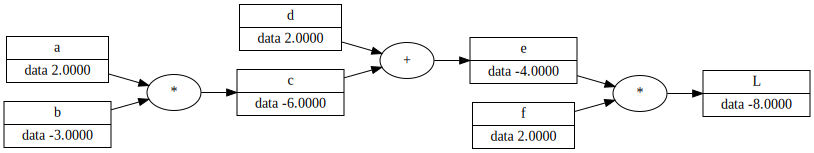

In [37]:
draw_dot(L)